In [1]:
!pip freeze

Jinja2==2.7.3
MarkupSafe==0.23
Pillow==2.7.0
PyYAML==3.11
Pygments==2.0.2
Theano==0.6.0
argparse==1.3.0
backports.ssl-match-hostname==3.4.0.2
certifi==14.05.14
holoviews==0.7
ipython==3.0.0
jsonschema==2.4.0
mahotas==1.2.4
matplotlib==1.4.3
mistune==0.5
mock==1.0.1
-e git+git@github.com:Neuroglycerin/neukrill-net-tools.git@8769bc55415360058cd2e076c6566f59443b3016#egg=neukrill_net-dev
nose==1.3.4
numpy==1.9.1
param==1.2.1
ptyprocess==0.4
py==1.4.26
-e git+https://github.com/lisa-lab/pylearn2.git@cf3999e7183f8dcaccccf4dfd2a31bbe3a948a97#egg=pylearn2-dev
pyparsing==2.0.3
pytest==2.6.4
python-dateutil==2.4.0
pytz==2014.10
pyzmq==14.5.0
scikit-image==0.10.1
scikit-learn==0.15.2
scipy==0.14.0
six==1.8.0
terminado==0.5
tornado==4.1
wsgiref==0.1.2


In [2]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [4]:
cd ..

/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-work


In [5]:
cd ../neukrill-net-work

/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-work


In [6]:
import sys
import numpy as np
import skimage.io

In [20]:
import skimage.transform

In [7]:
import imp

In [8]:
import neukrill_net.utils as utils
import neukrill_net.image_processing as image_processing
import neukrill_net.augment as augment

In [9]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
reload(image_processing)
reload(augment)

<module 'neukrill_net.augment' from '/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-tools/neukrill_net/augment.py'>

In [12]:
img = skimage.io.imread('data/train/acantharia_protist/100224.jpg')

In [13]:
type(img)

numpy.ndarray

In [14]:
img.shape

(66, 59)

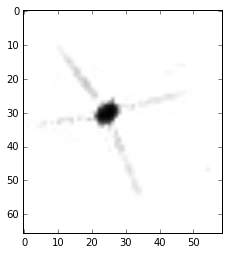

In [15]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

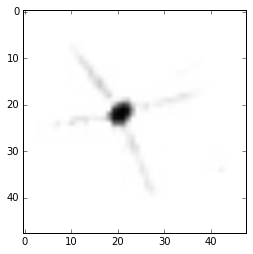

In [19]:
img2 = image_processing.resize_image(img,(48,48))
imgplot = plt.imshow(img2)
imgplot.set_cmap('gray')

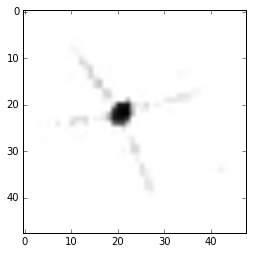

In [31]:
img3 = np.concatenate((255*np.ones((66,4),dtype='uint8'),img,255*np.ones((66,3),dtype='uint8')),1)
img3 = skimage.transform.resize(img3,(48,48),order=0)
imgplot = plt.imshow(img3)
imgplot.set_cmap('gray')

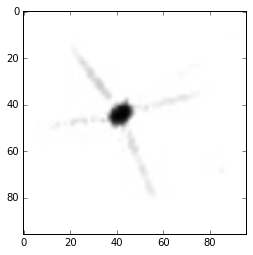

In [32]:
img2 = image_processing.resize_image(img,(96,96))
imgplot = plt.imshow(img2)
imgplot.set_cmap('gray')

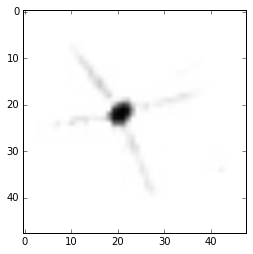

In [33]:
img2 = image_processing.resize_image(img,(48,48))
imgplot = plt.imshow(img2)
imgplot.set_cmap('gray')

In [35]:
augFnc = augment.RandomAugment(rotate=-1,skew=5,flip=1,shunt=0.075,resize=(48,48))

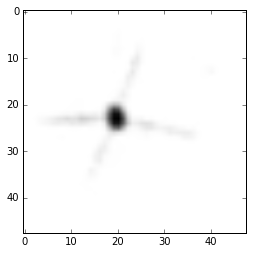

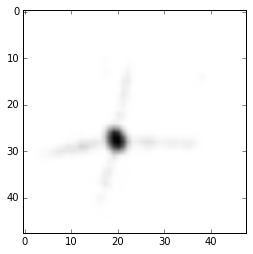

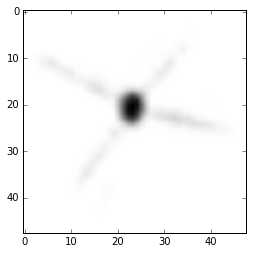

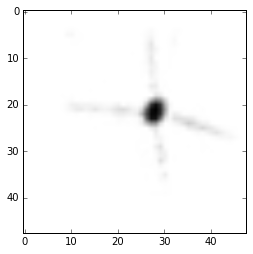

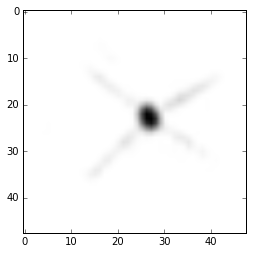

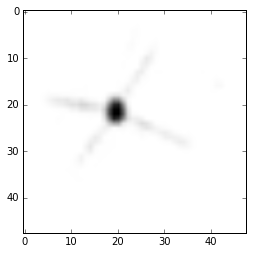

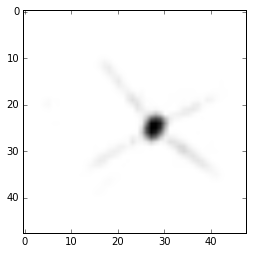

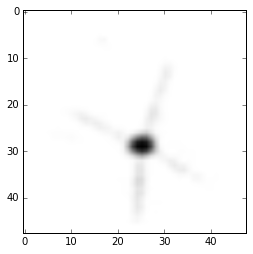

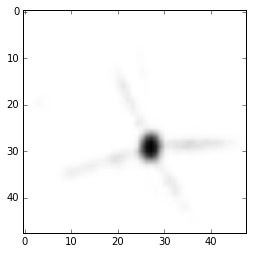

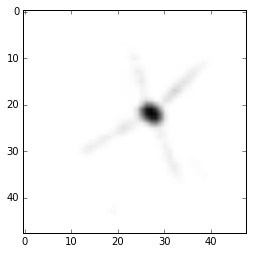

In [36]:
for i in range(10):
    imgplot = plt.imshow(augFnc(img2))
    imgplot.set_cmap('gray')
    show()

Let's see if we can fix this

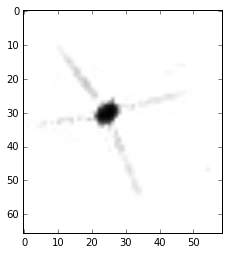

In [15]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

In [38]:
M = skimage.transform.AffineTransform()

In [42]:
M.rotation

0.0

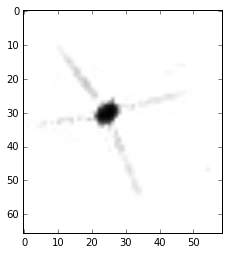

In [43]:
image = skimage.transform.warp(img, M, cval=1.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

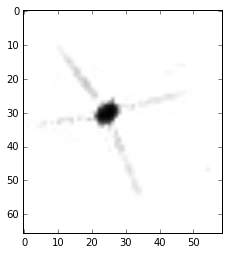

In [44]:
image = skimage.transform.warp(img, M, cval=1.0, order=0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

In [45]:
M.rotation = np.pi

AttributeError: can't set attribute

In [102]:
M = skimage.transform.AffineTransform(rotation=np.pi)

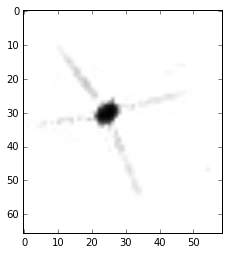

In [51]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

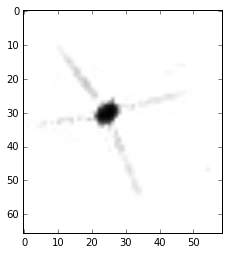

In [52]:
imgplot = plt.imshow(skimage.img_as_float(img))
imgplot.set_cmap('gray')

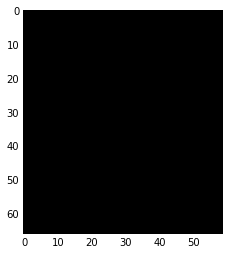

In [103]:
image = skimage.transform.warp(skimage.img_as_float(img), M, cval=1.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

In [66]:
print skimage.img_as_float(img).dtype
print img.dtype

float64
uint8


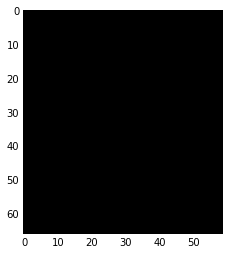

In [50]:
image = skimage.transform.warp(img, M, cval=1.0, order=0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

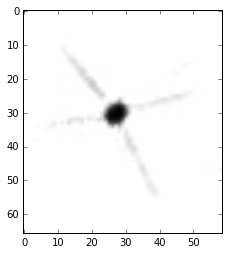

In [98]:
# Create Affine transform with shear
aft = skimage.transform.AffineTransform(shear=5.0/180*np.pi)

# Apply transform to image data
image = skimage.transform.warp(img, aft, cval=1.0)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

False


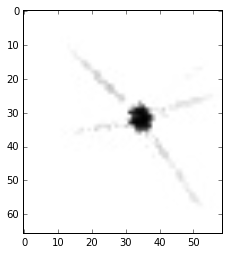

In [97]:
# Create Affine transform with shear
aft = skimage.transform.AffineTransform(shear=np.pi)

# Apply transform to image data
image = skimage.transform.warp(img, aft, cval=1.0, order=0)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

print np.allclose(image,img)

False


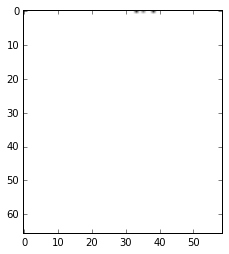

In [105]:
# Create Affine transform with shear
aft = skimage.transform.AffineTransform(rotation=0.5*np.pi)

# Apply transform to image data
image = skimage.transform.warp(img, aft, cval=1.0, order=0)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

print np.allclose(image,img)

False


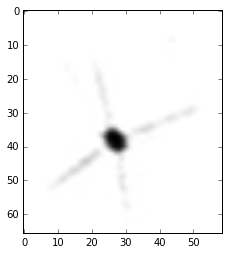

In [127]:
# Create Affine transform with shear
shift_y, shift_x = np.array(image.shape[:2]) / 2.
tf_shift = skimage.transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = skimage.transform.SimilarityTransform(translation=[shift_x, shift_y])

aft = skimage.transform.AffineTransform(rotation=0.5*np.pi)

# Apply transform to image data
image = skimage.transform.warp(img, (tf_shift + (aft + tf_shift_inv)), cval=1.0)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

print np.allclose(image,img)

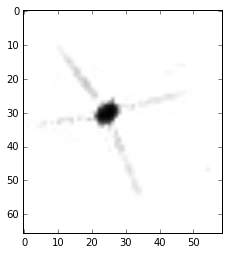

In [51]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

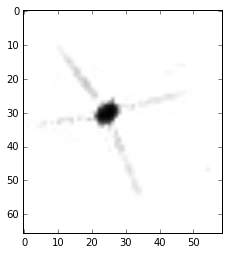

In [51]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

False


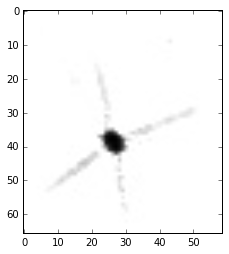

In [128]:
# Create Affine transform with shear
shift_y, shift_x = np.array(image.shape[:2]) / 2.
tf_shift = skimage.transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = skimage.transform.SimilarityTransform(translation=[shift_x, shift_y])

aft = skimage.transform.AffineTransform(rotation=0.5*np.pi)

# Apply transform to image data
image = skimage.transform.warp(img, (tf_shift + (aft + tf_shift_inv)), cval=1.0, order=0)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

print np.allclose(image,img)

False


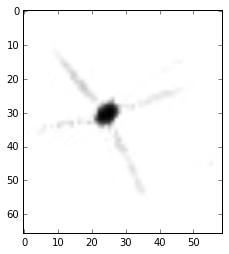

In [144]:
# Create Affine transform with shear
shift_y, shift_x = np.array(image.shape[:2]) / 2.
tf_shift = skimage.transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = skimage.transform.SimilarityTransform(translation=[shift_x, shift_y])

aft = skimage.transform.AffineTransform(rotation=0.02*np.pi)

# Apply transform to image data
image = ( 0.5 * skimage.transform.warp(img, (tf_shift + (aft + tf_shift_inv)), cval=1.0, order=1) +
            0.5 * skimage.transform.warp(img, (tf_shift + (aft + tf_shift_inv)), cval=1.0, order=0)
            )

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

print np.allclose(image,img)

In [147]:
reload(image_processing)

<module 'neukrill_net.image_processing' from '/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-tools/neukrill_net/image_processing.py'>

False


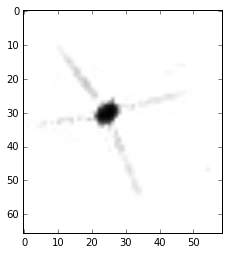

In [148]:
# Create Affine transform with shear
image = image_processing.custom_transform_nice_units(img)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

print np.allclose(image,img)

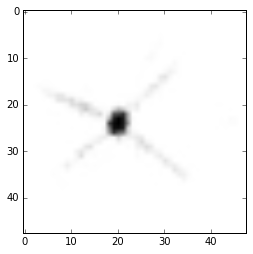

In [151]:
# Create Affine transform
image = image_processing.custom_transform_nice_units(img2, rotation=30)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

In [240]:
reload(image_processing)

<module 'neukrill_net.image_processing' from '/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-tools/neukrill_net/image_processing.py'>

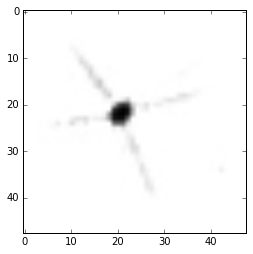

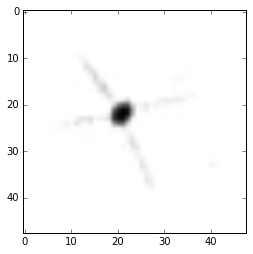

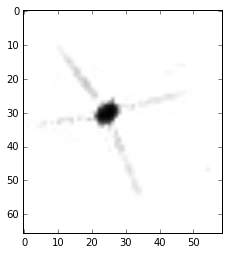

In [242]:
img2b = image_processing.resize_image(img,(48,48),order=0.75)
imgplot = plt.imshow(img2b)
imgplot.set_cmap('gray')
show()

# Create Affine transform
#image = image_processing.custom_transform_nice_units(img2b, rotation=30, shear=5, order=0.5, translation=(-0.1,0.1))
image = image_processing.custom_transform_nice_units(img2b, scale=1.1)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')
show()

imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

In [243]:
img_ = skimage.io.imread('data/train/hydromedusae_bell_and_tentacles/101932.jpg')

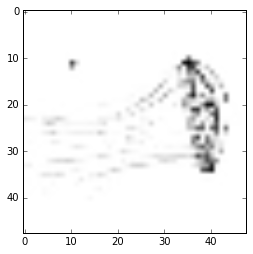

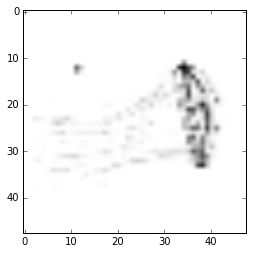

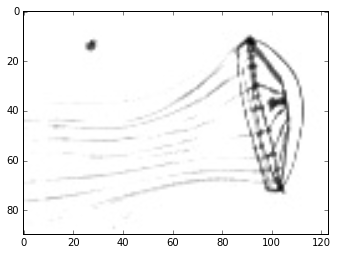

In [245]:
img2b = image_processing.resize_image(img_,(48,48),order=0.75)
imgplot = plt.imshow(img2b)
imgplot.set_cmap('gray')
show()

# Create Affine transform
#image = image_processing.custom_transform_nice_units(img2b, rotation=30, shear=5, order=0.5, translation=(-0.1,0.1))
image = image_processing.custom_transform_nice_units(img2b, scale=1.1)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')
show()

imgplot = plt.imshow(img_)
imgplot.set_cmap('gray')

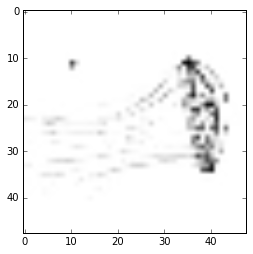

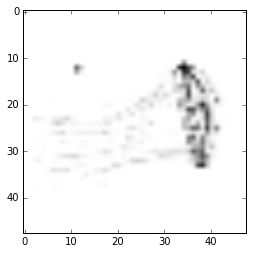

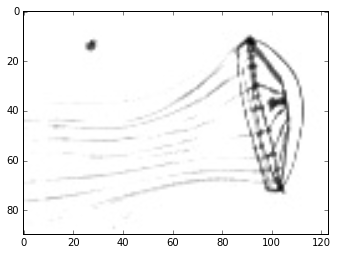

In [250]:
img2b = image_processing.resize_image(img_,(48,48),order=0.75)
imgplot = plt.imshow(img2b)
imgplot.set_cmap('gray')
show()

# Create Affine transform
#image = image_processing.custom_transform_nice_units(img2b, rotation=30, shear=5, order=0.5, translation=(-0.1,0.1))
image = image_processing.custom_transform_nice_units(img2b, scale=1.1)

imgplot = plt.imshow(image)
imgplot.set_cmap('gray')
show()

imgplot = plt.imshow(img_)
imgplot.set_cmap('gray')

Let's try random augmentations again

In [285]:
reload(image_processing)
reload(augment)

<module 'neukrill_net.augment' from '/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-tools/neukrill_net/augment.py'>

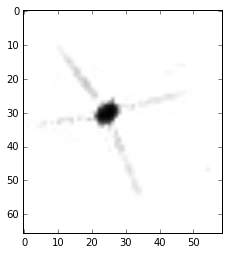

In [255]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

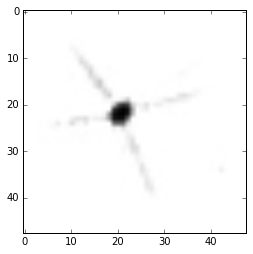

In [256]:
img2b = image_processing.resize_image(img,(48,48),order=0.75)

imgplot = plt.imshow(img2b)
imgplot.set_cmap('gray')

In [254]:
augFnc = augment.RandomAugment(rotate=-1,skew=5,flip=1,shunt=0.075,resize=(48,48))

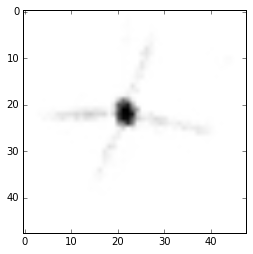

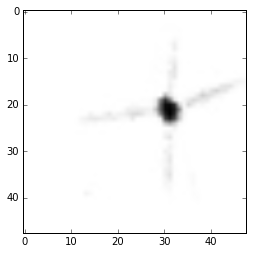

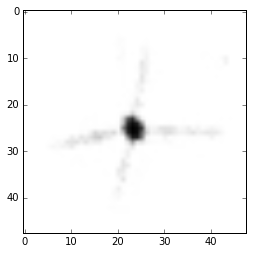

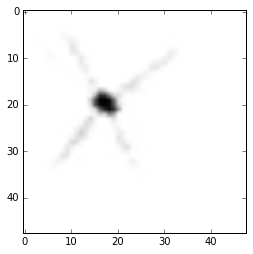

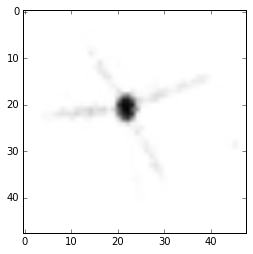

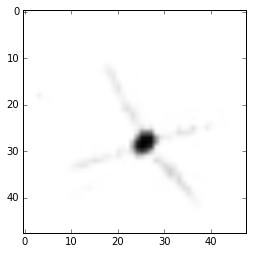

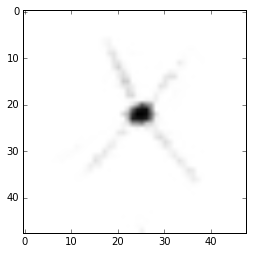

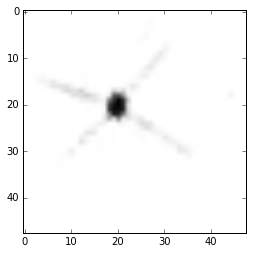

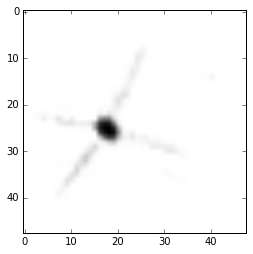

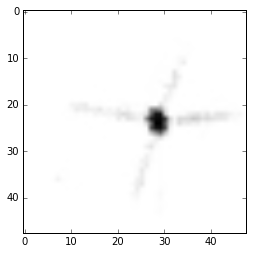

In [257]:
for i in range(10):
    imgplot = plt.imshow(augFnc(img2))
    imgplot.set_cmap('gray')
    show()

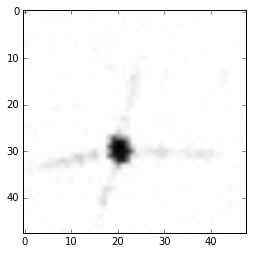

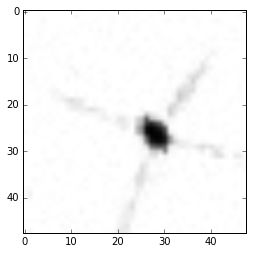

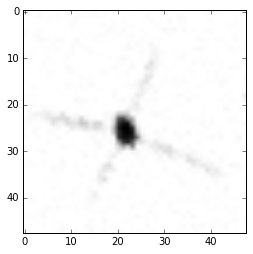

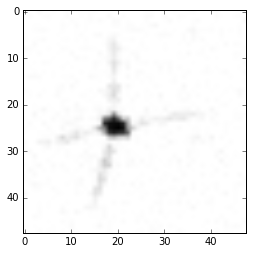

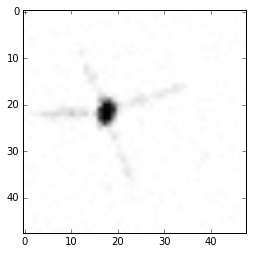

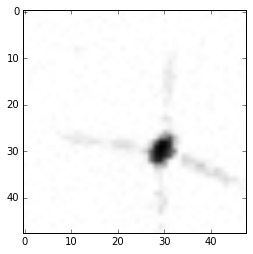

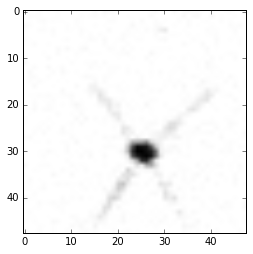

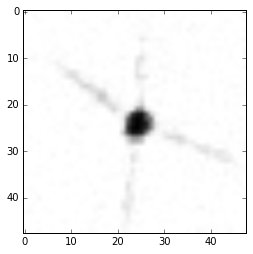

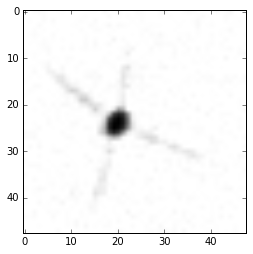

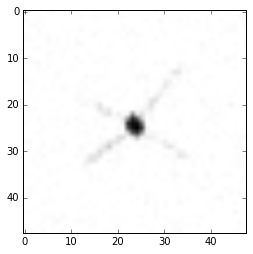

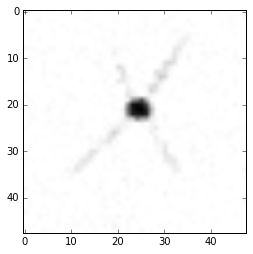

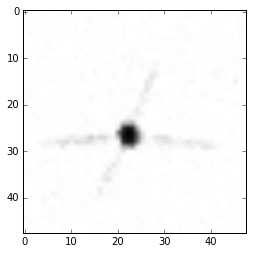

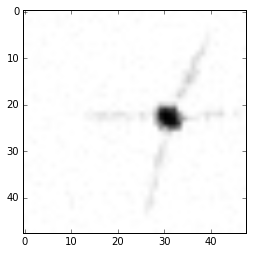

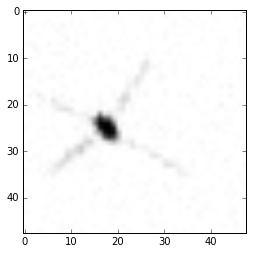

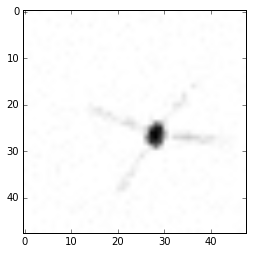

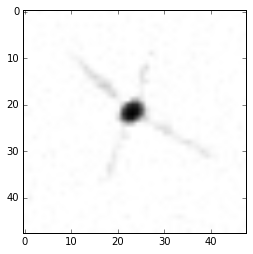

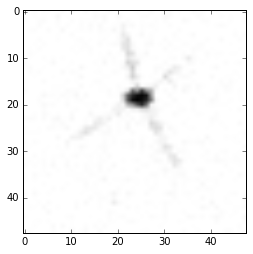

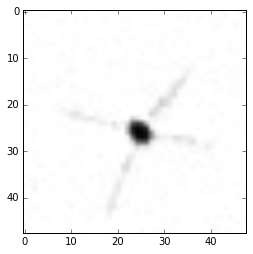

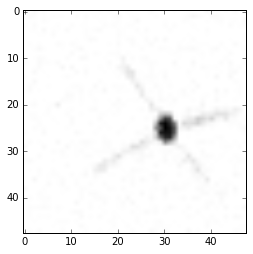

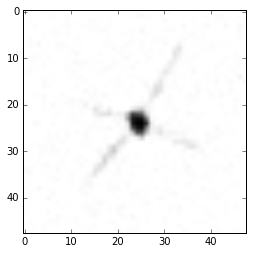

In [286]:
img2b = image_processing.resize_image(img,(48,48),order=0.75)
augFnc = augment.RandomAugment(flip=1, rotate=-1, scale=0.1, scale_asym=0.04, shear=6, shunt=0.05, noise=0.0001)
for i in range(20):
    imgplot = plt.imshow(augFnc(img2b))
    imgplot.set_cmap('gray')
    show()

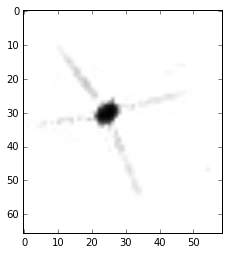

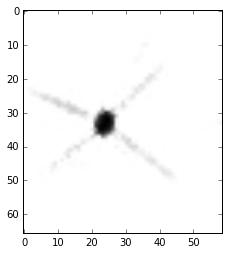

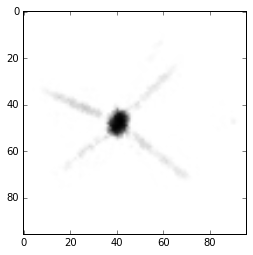

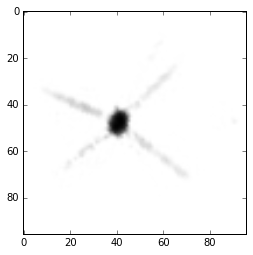

In [300]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')
show()

img_new = image_processing.custom_transform_nice_units(img, rotation=30)
imgplot = plt.imshow(img_new)
imgplot.set_cmap('gray')
show()

dwnimg = image_processing.custom_transform_nice_units(
            image_processing.resize_image(img,(96,96),order=0.75), rotation=30)
imgplot = plt.imshow(dwnimg)
imgplot.set_cmap('gray')
show()

img2b = image_processing.resize_image(img,(192,192),order=0.75)

dwnimg = skimage.transform.downscale_local_mean(
                image_processing.custom_transform_nice_units(img2b, rotation=30), (2,2), cval=255)
imgplot = plt.imshow(dwnimg)
imgplot.set_cmap('gray')
show()

Ok, so supersampling and then interpolating down is no good.

What if we use the magic kernel? 
http://johncostella.webs.com/magic/

In [301]:
import scipy

In [306]:
h = 0.5 * np.array([1.0/4, 3.0/4, 3.0/4, 1.0/4])
print h
k = np.outer(h,h)
print k

[ 0.125  0.375  0.375  0.125]
[[ 0.015625  0.046875  0.046875  0.015625]
 [ 0.046875  0.140625  0.140625  0.046875]
 [ 0.046875  0.140625  0.140625  0.046875]
 [ 0.015625  0.046875  0.046875  0.015625]]


In [307]:
img_dwn = scipy.ndimage.filters.convolve(img, k, mode='constant', cval=255.0)

In [319]:
img_dwn[::2,::2].shape

(33, 30)

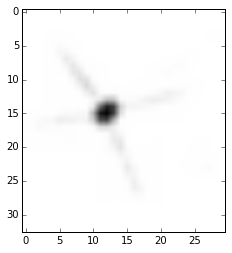

In [320]:
imgplot = plt.imshow(img_dwn[::2,::2])
imgplot.set_cmap('gray')
show()

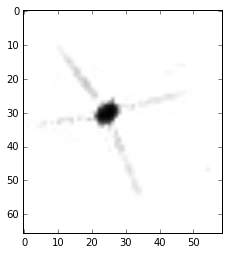

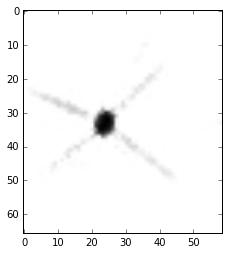

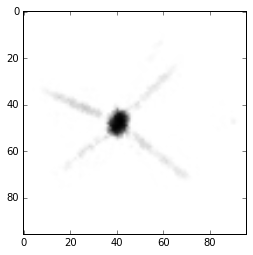

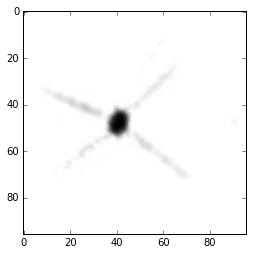

In [324]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')
show()

# Rotate the original
img_new = image_processing.custom_transform_nice_units(img, rotation=30)
imgplot = plt.imshow(img_new)
imgplot.set_cmap('gray')
show()

# Resize to 96x96, then rotate
img_new = image_processing.custom_transform_nice_units(
            image_processing.resize_image(img,(96,96),order=0.75), rotation=30)
imgplot = plt.imshow(img_new)
imgplot.set_cmap('gray')
show()

# Resize to 192x192, then rotate, then downscale with magic kernal
img_new = image_processing.resize_image(img,(192,192),order=0.75)
img_new = image_processing.custom_transform_nice_units(img_new, rotation=30)
img_new = scipy.ndimage.filters.convolve(img_new, k, mode='constant', cval=1.0)
img_new = img_new[::2,::2]
imgplot = plt.imshow(img_new)
imgplot.set_cmap('gray')
show()

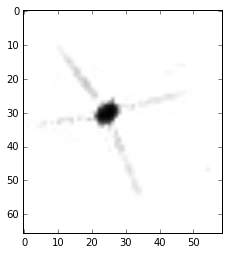

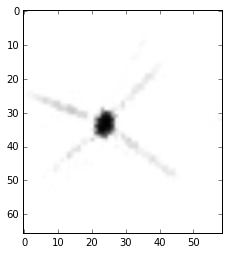

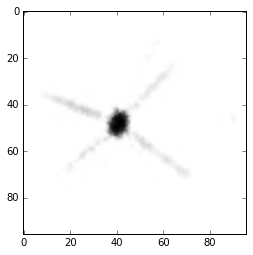

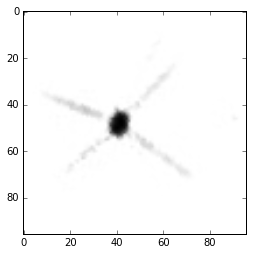

In [327]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')
show()

# Rotate the original
img_new = image_processing.custom_transform_nice_units(img, rotation=32)
imgplot = plt.imshow(img_new)
imgplot.set_cmap('gray')
show()

# Resize to 96x96, then rotate
img_new = image_processing.custom_transform_nice_units(
            image_processing.resize_image(img,(96,96),order=0.75), rotation=32)
imgplot = plt.imshow(img_new)
imgplot.set_cmap('gray')
show()

# Resize to 192x192, then rotate, then downscale without filtering
img_new = image_processing.resize_image(img,(192,192),order=0.75)
img_new = image_processing.custom_transform_nice_units(img_new, rotation=32)
img_new = img_new[::2,::2]
imgplot = plt.imshow(img_new)
imgplot.set_cmap('gray')
show()